<a href="https://colab.research.google.com/github/Truth300/truth_data/blob/main/Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/Fraud_check.csv')
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
data.tail(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
data.shape

(600, 6)

In [ ]:
data.ndim

2

In [ ]:
data.axes

[RangeIndex(start=0, stop=600, step=1),
 Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
        'Work.Experience', 'Urban'],
       dtype='object')]

In [ ]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [ ]:
null=data.isna().sum()
null

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
print('The dataframe has 0 missing values in Undergrad,Marital Statues,Taxable Income,City Population,Work Experience and Urban')

The dataframe has 0 missing values in Undergrad,Marital Statues,Taxable Income,City Population,Work Experience and Urban


In [ ]:
data[data.duplicated()].shape

(0, 6)

In [ ]:
data=data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1)
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
col_names=['Marital_Status','Taxable_Income','Urban']

In [ ]:
for val in col_names:
  print(data[val].value_counts())

Marital_Status
Single      217
Married     194
Divorced    189
Name: count, dtype: int64
Taxable_Income
59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: count, Length: 599, dtype: int64
Urban
YES    302
NO     298
Name: count, dtype: int64


In [ ]:
conditions=[data['Taxable_Income']<=30000,data['Taxable_Income']>30000]
choices=['Risky','Good']
data['Taxable_Income']=np.select(conditions,choices)
data.head(20)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


In [ ]:
label_data=data['Taxable_Income'].value_counts()
label_data

Taxable_Income
Good     476
Risky    124
Name: count, dtype: int64

In [ ]:
expl=(0.1,0.1)

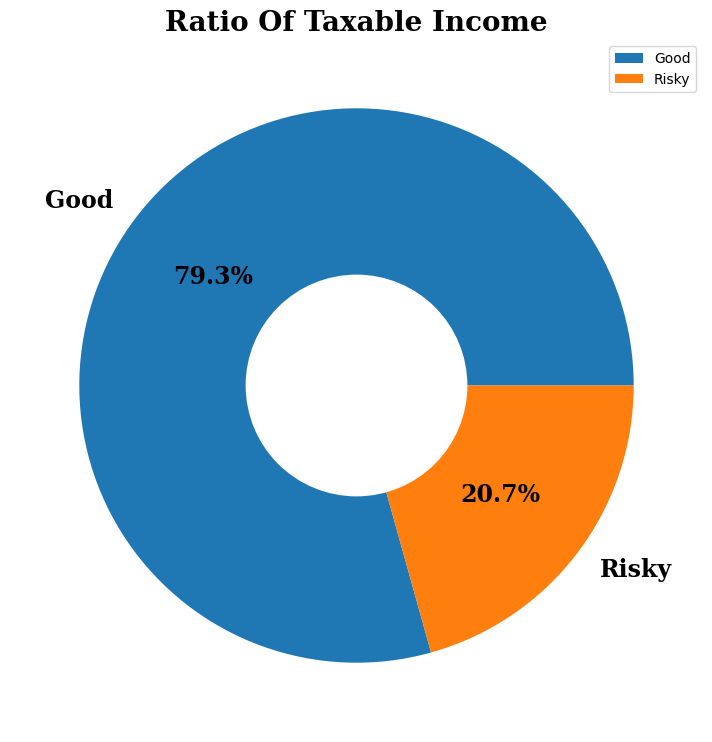

In [25]:
plt.figure(figsize=(15, 9))
plt.pie(label_data,labels=label_data.index,pctdistance=0.65,autopct='%1.1f%%',textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
hfont={'weight':'bold','family':'serif'}
plt.title('Ratio Of Taxable Income',size=20,**hfont)
center_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.legend ()
plt.show()

In [ ]:
continue_col=['City_Population','Work_Experience']
category=['Marital_Status','Taxable_Income','Urban']

In [ ]:
for val in continue_col:
  sns.displot(data=data, x=val, height=4,aspect=2 ,color='#496DF5')
  plt.show()

In [ ]:
palette='deep'
for cols in category:
  sns.displot(data=data,x=cols,height=4,aspect=2,color='red',palette=palette)
  plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['Urban', 'Undergrad'], drop_first=True)
data.head(5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
string_columns=['Marital_Status','Taxable_Income']

In [ ]:
number=LabelEncoder()
for i in string_columns:
  data[i]=number.fit_transform(data[i])
data.head()

In [ ]:
data.tail()

In [ ]:
plt.figure(figsize=(20, 10))
plt.boxplot(data, labels=['Marital_Status', 'Taxable_Income', 'City_Population', 'Work_Experience', 'Urban_YES', 'Undergrad_YES'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
sns.pairplot(data=data,hue='Taxable_Income')
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)

In [ ]:
x=data.drop(['Taxable_Income'],axis=1)
x.head()

In [ ]:
y=data['Taxable_Income']
y.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ms=StandardScaler()
x=pd.DataFrame(ms.fit_transform(x))
x.head()

In [ ]:
n_fold=KFold(10)
rf_model=RandomForestClassifier()
result=cross_val_score(rf_model,x,y,cv=n_fold)
result

In [ ]:
result.mean()

In [ ]:
result.std()

In [ ]:
rf_Model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4)
results=cross_val_score(rf_Model,x,y,cv=n_fold)
results.mean()

In [ ]:
results.std()

In [ ]:
rf_Model=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3)
results=cross_val_score(rf_Model,x,y,cv=n_fold)
results.mean()

In [ ]:
results.std()